Neural Network for Predicting Positive and Negative Numbers apart

In [100]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


Generating DataSet

In [101]:
# Set seed for reproducibility
np.random.seed(694)

# Generate random data
data_size = 100000
X = np.random.randint(-1000, 1000, size=(data_size, 1))

# Label: 1 for positive or zero, 0 for negative
y = (X >= 0).astype(int) 
X_normalized = X / 1000.0
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (80000, 1), Test data shape: (20000, 1)


In [102]:
# Define a simple neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),  # Input layer with 1 feature
    Dense(8, activation='relu'),                     # Hidden layer
    Dense(1, activation='sigmoid')                   # Output layer with sigmoid activation for binary classification
])
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Cool\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

Training

In [103]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9747 - loss: 0.1803 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9987 - loss: 0.0101 - val_accuracy: 0.9987 - val_loss: 0.0058
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9987 - val_loss: 0.0030
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9994 - val_loss: 0.0011
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9997 - loss: 9.0663e-0

Testing

In [104]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9994 - loss: 0.0010
Test accuracy: 1.00


In [105]:
# Test the model with new Data
new_data = np.array([[50], [-20], [0], [-1], [1000],[298]]) / 1000.0  # Normalized
true_labels = np.array([1, 0, 1, 0, 1, 1])
predictions = model.predict(new_data)
rounded_predictions = np.round(predictions)

print("Predictions -> (0=negative, 1=positive):")
print("Predicted results: ")
print(np.round(predictions))
print("Actual results: ")
print(true_labels)


conf_matrix = confusion_matrix(true_labels, rounded_predictions)

print("Confusion Matrix:")
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predictions -> (0=negative, 1=positive):
Predicted results: 
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]
Actual results: 
[1 0 1 0 1 1]
Confusion Matrix:
[[2 0]
 [1 3]]


Visualization of various metrics

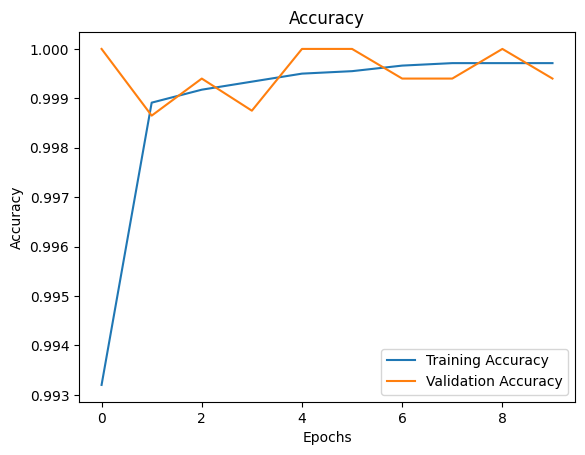

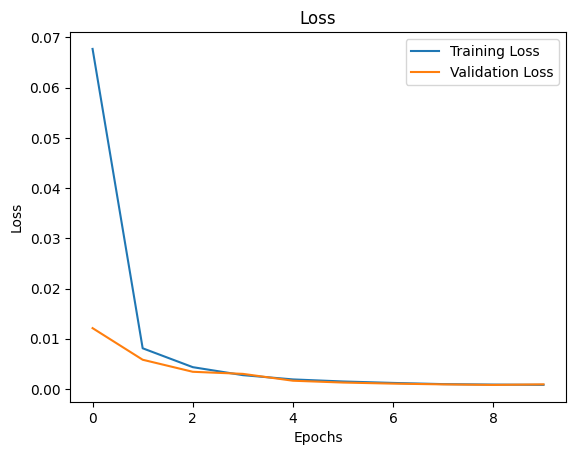

In [106]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
